电信运营公司客户流失预测。分析所有相关的客户数据并制定有针对性的客户保留计划。经过信息统计，一共得到7044个用户数据，数据中包括了关于客户的基本信息以及是否与运营商解约。其中是否解约就是本题需要预测的变量，具体数据和含义见下表
| 变量名称           | 变量含义                     | 变量类型   |
|--------------------|------------------------------|------------|
| customerID         | 客户ID                       | 数值型     |
| gender             | 性别                         | 离散型     |
| SeniorCitizen      | 是否退休                     | 离散型     |
| Partner            | 是否有配偶                   | 离散型     |
| Dependents         | 是否有家属                   | 离散型     |
| tenure             | 在网时间（以月为单位）        | 数值型     |
| PhoneService       | 是否开通电话服务业务          | 离散型     |
| MultipleLines      | 是否开通多线业务              | 离散型     |
| InternetService    | 网络供应方式                  | 离散型     |
| OnlineSecurity     | 是否开通网络安全服务          | 离散型     |
| OnlineBackup       | 是否开通网络备份服务          | 离散型     |
| DeviceProtection   | 是否开通设备保护服务          | 离散型     |
| TechSupport        | 是否开通设备支持服务          | 离散型     |
| StreamingTV        | 是否开通电视服务              | 离散型     |
| StreamingMovies    | 是否开通电影服务              | 离散型     |
| Contract           | 签订合同方式                  | 离散型     |
| PaperlessBilling   | 是否开通电子账单              | 离散型     |
| PaymentMethod      | 支付方式                     | 离散型     |
| MonthlyCharges     | 月费用                       | 数值型     |
| TotalCharges       | 总费用                       | 数值型     |
| Churn              | 是否解约                     | 离散型     |

（1）计算tenure（在网时间）的特征信息，如最大值，最小值，均值及方差，并写入“在网时间特征量.csv“文件，格式如下：（5分） 
|最大值|最小值|均值|方差|
|-|-|-|-|

（2）对特征进行one-hot编码，对标签进行数字编码，按照8:2划分训练集测试集，随机种子指定42。使用K近邻算法，设定K = 5，对Churn（是否解约）进行预测，将模型在训练集、测试集上的精确率写入“精确率.csv“文件，格式如下：（15分）
|训练集精确率|测试集精确率|
|-|-|

（3）利用训练出的模型绘制预测结果的PR曲线(Precision-Recall curve)，并保存为‘PR曲线.jpg’（5分） 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, det_curve, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("exercise3/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### (1)
计算tenure（在网时间）的特征信息，如最大值，最小值，均值及方差，并写入“在网时间特征量.csv“文件，格式如下：（5分） 
|最大值|最小值|均值|方差|
|-|-|-|-|


In [3]:
result = pd.DataFrame([[
    data["tenure"].max(),
    data["tenure"].min(),
    data["tenure"].mean(),
    data["tenure"].var(),
]], columns = ["最大值","最小值","均值","方差"])
result

,最大值,最小值,均值,方差
0,72,0,32.371149,603.168108


In [4]:
result.to_csv("exercise3/在网时间特征量.csv", index = False)

#### (2)
对特征进行one-hot编码，对标签进行数字编码，按照8:2划分训练集测试集，随机种子指定42。使用K近邻算法，设定K = 5，对Churn（是否解约）进行预测，将模型在训练集、测试集上的精确率写入“精确率.csv“文件，格式如下：（15分）
|训练集精确率|测试集精确率|
|-|-|

In [5]:
le = LabelEncoder()
le.fit(data["Churn"])
data["Churn"] = le.transform(data["Churn"])
data = pd.get_dummies(data)
x_train, x_test, y_train, y_test = train_test_split(data.drop(["Churn"], axis = 1), data["Churn"], test_size = 0.2, random_state = 42)
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)
train_acc = accuracy_score(y_train, y_train_predict)
test_acc = accuracy_score(y_test, y_test_predict)
result2 = pd.DataFrame([[
    train_acc,
    test_acc,
]], columns = ["训练集精确率", "测试集精确率"])
result2.to_csv("exercise3/精确率.csv", index = False)

#### （3）
利用训练出的模型绘制预测结果的PR曲线(Precision-Recall curve)，并保存为‘PR曲线.jpg’（5分） 

In [6]:
p, r, th = precision_recall_curve(y_test, model.predict_proba(x_test)[:,1])

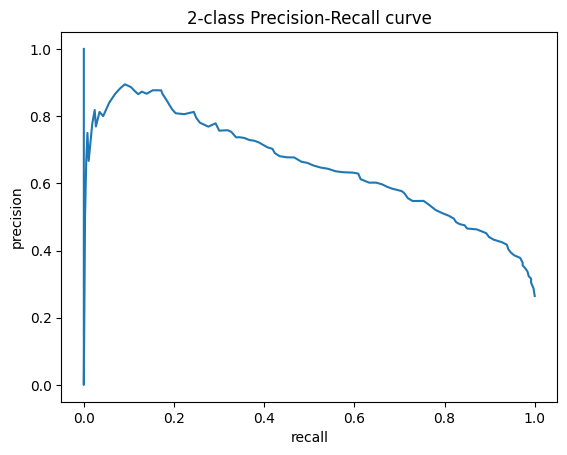

In [7]:
plt.show()
plt.plot(r, p)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("2-class Precision-Recall curve")
# plt.tight_layout()
plt.savefig("exercise3/PR曲线.jpg")
plt.show()